# [Solution] Lab3 - Introduction to Deep Neural Network
- Author: Thanat Lapthawan

## Lab Instruction 

In this lab, you will learn to create a simple fully-connect neural network using Keras library with Tensorflow backend. We will play with MNIST data which is a Keras build-in dataset. 

See http://yann.lecun.com/exdb/mnist

First, import all the library that we will use in this lab

In [1]:
import keras
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

### Load Data ###
(X_train,y_train),(X_test,y_test) = mnist.load_data()
#################

### 1. Learn About the Data

Understand your data. For example, its shape, format, datatype, structure, distribution, data classes, etc.

#### 1.1 Distribution

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

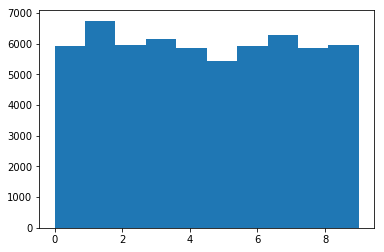

In [3]:
# Distribution of the class in train-set
plt.hist(y_train)

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

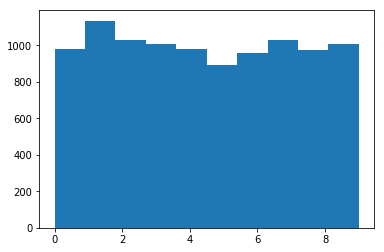

In [4]:
# Distribution of the class in test-set
plt.hist(y_test)

**Finding** The data is equally distribute amoung trainset and testset. 

#### 1.2 Type of dataset

In [5]:
print('Feature type: %s'%type(X_train))
print('Label type: %s'%type(y_train))

Feature type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>


#### 1.3 Type of value in the dataset

In [6]:
print('Feature data type: %s'%X_train.dtype)
print('Label data type: %s'%y_train.dtype)

Feature data type: uint8
Label data type: uint8


#### 1.4 Shape

In [7]:
print('Train_set Feature shape: %s'%str(X_train.shape))
print('Train_set Label type: %s'%str(y_train.shape))
print('Test_set Feature shape: %s'%str(X_test.shape))
print('Test_set Label type: %s'%str(y_test.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


#### 1.5 Dimension

In [8]:
print('Train_set Feature dimension: %s'%str(X_train.ndim))
print('Train_set Label dimension: %s'%str(y_train.ndim))
print('Test_set Feature dimension: %s'%str(X_test.ndim))
print('Test_set Label dimension: %s'%str(y_test.ndim))

Train_set Feature dimension: 3
Train_set Label dimension: 1
Test_set Feature dimension: 3
Test_set Label dimension: 1


#### 1.6 Characteristic of data 

In [9]:
# How the data looklike in numpy array
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Finding** The image have a value range from 0, representing black color, to 255, representing white color.

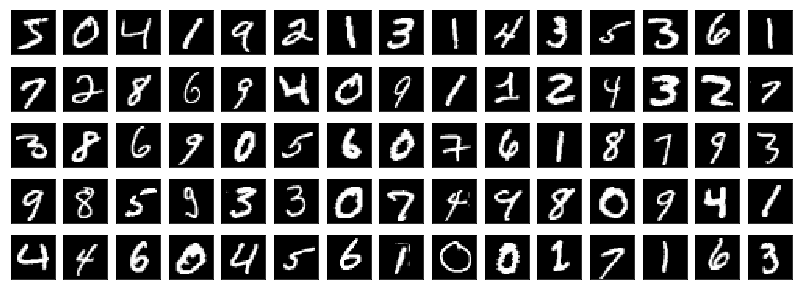

In [10]:
# Plot number to see how the hand written looklike
plt.figure(2, figsize = (14, 5))
plt.set_cmap('gray')
for i in range(75):
    plt.subplot(5, 15, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
plt.show()

In [11]:
# Show label to see how it look like
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 2. Build Neural Network Model

Build a two-layer neural network using `Sequential()`
( See https://keras.io/models/sequential ) 
> INPUT -> LINEAR -> RELU -> LINEAR -> Softmax

with the hidden layer of size 512

See Keras Model: https://keras.io/models/about-keras-models/



In [12]:
from keras import layers
from keras import models
dnn = models.Sequential()
dnn.add(layers.Dense(512,activation='relu',input_shape=(28*28,),name='hidden_1'))
dnn.add(layers.Dense(10,activation='softmax',name='output'))

Compile your model with the following argument.

```
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy']
```

In [13]:
# Use sparse cross entropy instead.
dnn.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Let's see how our model looklike using `.summary()`

In [14]:
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 3. Preprocessing

- Reshape the features data (flattern) and normalize the value to be between 0 and 1
- One-hot the target data

In [15]:
X_train = X_train.reshape(60000,28*28).astype('float32')/255.
X_test = X_test.reshape(10000,28*28).astype('float32')/255.


### 4. Model Training 

Use `.fit()` to train your neural network model and return the record of accuracy and loss value in each epoch

We will train model with 10 epoch (If you confident with your computer performance, you can trian model with more epoch.)

We will train with mini-batch method with each the batch size equal to 128 data.

To prevent the overfit with test set, we will split a current training data into 90% for training and 10% for validating model.

This process will take about a minute.

In [16]:
history=dnn.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.1,verbose=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 41us/step - loss: 1.1708 - acc: 0.7256 - val_loss: 0.5970 - val_acc: 0.8783
Epoch 2/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.5594 - acc: 0.8633 - val_loss: 0.4072 - val_acc: 0.9047
Epoch 3/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.4446 - acc: 0.8844 - val_loss: 0.3418 - val_acc: 0.9143
Epoch 4/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.3928 - acc: 0.8947 - val_loss: 0.3079 - val_acc: 0.9195
Epoch 5/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.3617 - acc: 0.9017 - val_loss: 0.2864 - val_acc: 0.9237
Epoch 6/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.3397 - acc: 0.9065 - val_loss: 0.2704 - val_acc: 0.9287
Epoch 7/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.3229 - acc: 0.9104 - val_loss: 0.2589 - val_acc:

In [17]:
# Show last train and validate accuracy
print('Train acc: %s'%history.history['acc'][-1])
print('Validate acc: %s'%history.history['val_acc'][-1])

Train acc: 0.9208518519048338
Validate acc: 0.9361666666666667


We will plot the loss and accuracy of both train set and validate set over iteration.

In [18]:
# define a function to plot the result from training step

def show_result(history): 
    
    # Print the result from the last epoch
    print('Last train accuracy: %s'%history.history['acc'][-1])
    print('Last validation accuracy: %s'%history.history['val_acc'][-1])
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(loss) + 1)   
    
    # Define a subplot 
    fig, axs = plt.subplots(1,2,figsize=(15,4))
    
    # Plot loss
    loss_plot = axs[0]
    
    loss_plot.plot(epochs, loss, 'c--', label='Training loss')
    loss_plot.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_plot.set_title('Training and validation loss')
    loss_plot.set_xlabel('Epochs')
    loss_plot.set_ylabel('Loss')
    loss_plot.legend()
    
    # Plot accuracy
    acc_plot = axs[1]
    
    acc_plot.plot(epochs, acc, 'c--', label='Training acc')
    acc_plot.plot(epochs, val_acc, 'b', label='Validation acc')
    acc_plot.set_title('Training and validation accuracy')
    acc_plot.set_xlabel('Epochs')
    acc_plot.set_ylabel('Accuracy')
    acc_plot.legend()

Last train accuracy: 0.9208518519048338
Last validation accuracy: 0.9361666666666667


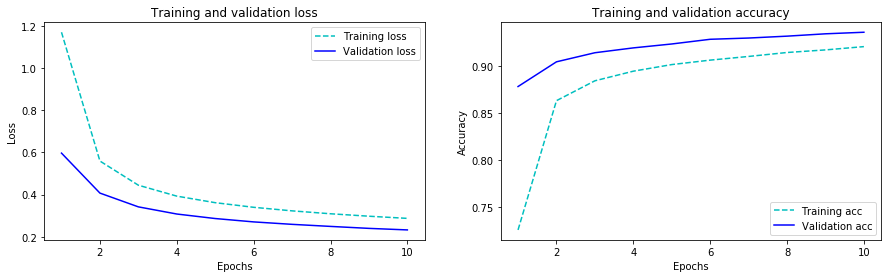

In [19]:
show_result(history)

At which iteration does your model start to get overfit? give your reason.

**ANSWER**

*The answer based on the result that you get*

The model is not overfit because from the graph show that the validation accuracy can go further and the loss and go lower. However, the slope from the graph start to get less steep at epoch 2 and likely to get less steep at the higher epoch. Thus, the model can get overfit soon with more epoch.

### 5. Model Evaluation

Evaluate your model with test set using `.evaluate()` and compare the result with the training set and validate set. Does your model overfit or underfit? How about the bias and variance?

In [20]:
dnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 35us/step


[0.26808859528005125, 0.925]

Use confusion matrix to analyse the performance of your model. which class does your model classify poorly. What is your model precision and recall. 

In [21]:
pred = dnn.predict(X_test)

In [22]:
# Show an output from the prediction
pred[0]

array([1.6317501e-04, 1.0804604e-06, 2.7297367e-04, 1.4859344e-03,
       1.7692297e-05, 9.5731433e-05, 6.8388704e-07, 9.9631953e-01,
       7.5585136e-05, 1.5676526e-03], dtype=float32)

In [23]:
# Convert probability to class
pred_class=pred.argmax(axis=1)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

### evaluate your model ###
cm = confusion_matrix(y_test,pred_class)
print(cm)
###########################

[[ 958    0    2    3    0    3   11    1    2    0]
 [   0 1111    2    2    1    1    4    2   12    0]
 [   9    3  918   15   14    0   12   16   38    7]
 [   1    1   17  933    0   19    3   12   16    8]
 [   1    3    4    1  926    1    9    2    4   31]
 [   9    3    2   38    8  777   17    6   24    8]
 [   9    3    3    3   14    9  914    1    2    0]
 [   2   10   24    6    7    0    0  946    3   30]
 [   6    6    6   24    8   16   14   12  870   12]
 [  12    7    3   13   47    7    1   15    7  897]]


In [25]:
print(classification_report(y_test,pred_class))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.97      0.98      0.97      1135
          2       0.94      0.89      0.91      1032
          3       0.90      0.92      0.91      1010
          4       0.90      0.94      0.92       982
          5       0.93      0.87      0.90       892
          6       0.93      0.95      0.94       958
          7       0.93      0.92      0.93      1028
          8       0.89      0.89      0.89       974
          9       0.90      0.89      0.90      1009

avg / total       0.93      0.93      0.92     10000




**ANSWER**

*The answer based on the result that you get*

From the confusion matrix, the model perform well as most of the test data are correctly predicted. There are some error for some class. For example, class 9 are mostly incorrectly predicted with class 4. From the classification report, the precision show that class 8 perform worst than others as the cofusion matrix show you that this class are mostly incorrectly predicted with other classes.

### 6. Model tuning

Try to tune your model by: 
1. Adjust the learning rate of your optimizer by increasing and decreasing learning rate and see how it affect your model. See https://keras.io/optimizers
2. Try using different optimizer ('sgd', 'rmsprop', 'adagrad', 'adam', See https://keras.io/optimizers ) and see which one converge faster.
3. Change your the model structure by adding more hidden layer with any number of node and see how it affect your model.

In [26]:
# Define a network and save the weight to be reuse later.

dnn = models.Sequential()
dnn.add(layers.Dense(512,activation='relu',input_shape=(28*28,),name='hidden_1'))
dnn.add(layers.Dense(10,activation='softmax',name='output'))
dnn.save_weights('two_layer_nn.h5')
dnn.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
# Define variable to store all history
save_history = []

In [28]:
model_file = 'model_1'

'experiment_model/%s'%model_file

'experiment_model/model_1'

In [29]:
# Define a function to train a network for experiment purpose

def fit_model(save_history, model_file, optimizer, batch_size = 128, epochs=10, validation_split=0.1, verbose=False):
    dnn.load_weights('two_layer_nn.h5')
    dnn.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history=dnn.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=validation_split,verbose=verbose)
    dnn.save_weights('experiment_model/%s'%model_file)
    save_history.append(history)
    show_result(history)
    return save_history

#### Adjust learning rate 

Last train accuracy: 0.9985555555555555
Last validation accuracy: 0.9844999995231628


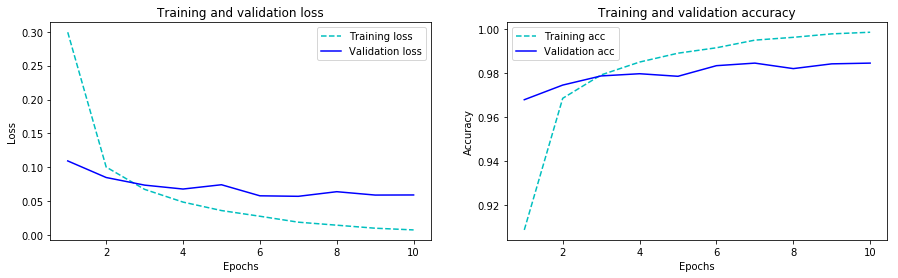

In [30]:
# Adjust learning rate to 1
# Experiment 0
from keras import optimizers

save_history = fit_model(save_history,
                         model_file = 'experiment_0.h5',
                         optimizer = optimizers.SGD(lr=1),
                         batch_size = 128,
                         epochs = 10)

The model get overfit very quickly around epoch 3 because of high learning rate which make model overfit quickly compare to learning rate of 0.01.

Last train accuracy: 0.5772962963492781
Last validation accuracy: 0.6100000003178915


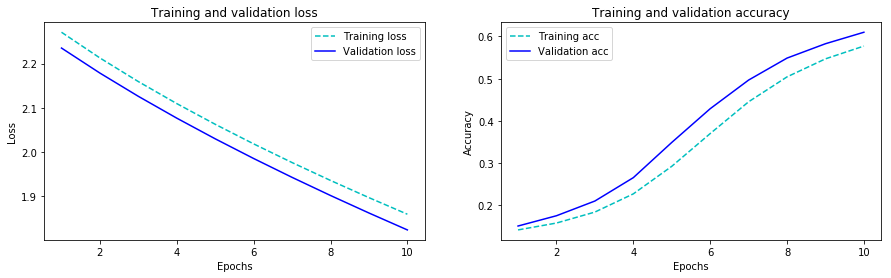

In [31]:
# Adjust learning rate to 0.0001
# Experiment 1

save_history = fit_model(save_history, 
                         model_file = 'experiment_1.h5',
                         optimizer = optimizers.SGD(lr=0.0001))

The model is underfit and far from being fit based on the previous outcome. This is because the learning rate is too small. Thus, the model need to take more time to converge.

#### Change the optimizer function

Last train accuracy: 0.9996481481481482
Last validation accuracy: 0.983333333492279


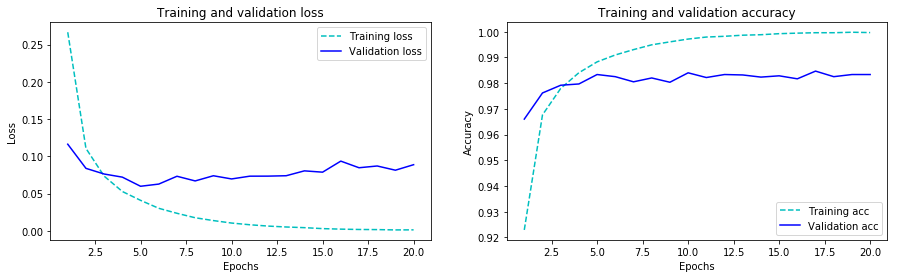

In [32]:
# Use 'rmsprop' as a optimizer
# Experiment 2

save_history = fit_model(save_history, 
                         model_file = 'experiment_2.h5',
                         optimizer = 'rmsprop',
                         batch_size = 128,
                         epochs = 20)

The model is overfit quickly at epoch 3 as the accuracy and loss of validation are stable. From the graph, the model seen to be converge at around 15 - 17 epoch because the accuracy and loss of training data become stable.

Last train accuracy: 0.9970925925396107
Last validation accuracy: 0.9830000001589457


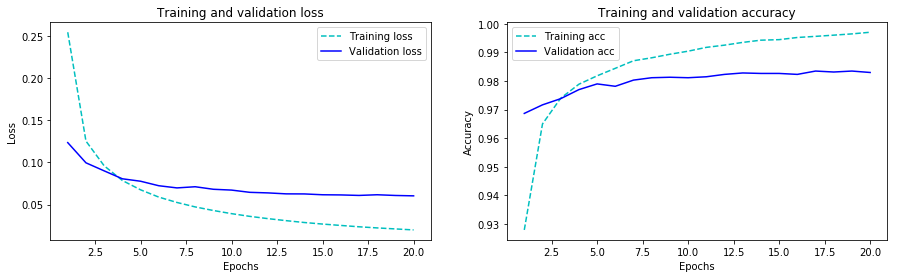

In [33]:
# Use 'adagrad' as a optimizer
# Experiment 3

save_history = fit_model(save_history, 
                         model_file = 'experiment_3.h5',
                         optimizer = 'adagrad',
                         batch_size = 128,
                         epochs = 20)

The model is overfit quickly at epoch 3 as the accuracy and loss of validation are stable. From the graph, the model is not converge yet. However, the graph show that the loss and accuracy is getting less steep.

Last train accuracy: 0.9962777777777778
Last validation accuracy: 0.9788333328564962


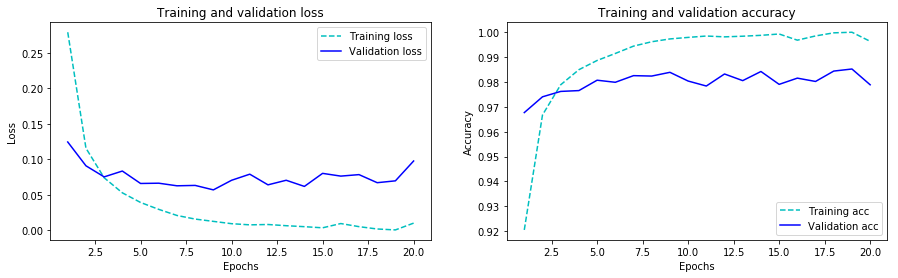

In [34]:
# Use 'adam' as a optimizer
# Experiment 4

save_history = fit_model(save_history, 
                         model_file = 'experiment_4.h5',
                         optimizer = 'adam',
                         batch_size = 128,
                         epochs = 20)

From the graph, there are some spike which is cause by optimier and the model is converge very quickly compare to other optimizer at around 10 epoch. The model is overfit quickly at 3 epoch.

From the result using different optimizer, the fastest optimizer are both rmsprop and adam which get overfit at epoch 3 with highest accuracy follow by adagrad which overfit at epoch 4. The slowest optimizer is sgd which need more than 10 epoch before it get overfit. 

#### Increase Epoch 

Last train accuracy: 0.9629444443914625
Last validation accuracy: 0.9699999996821086


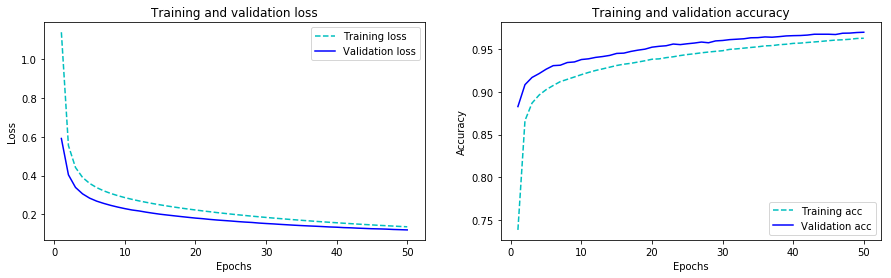

In [35]:
# Train more epoch using sgd optimizer
# Experiment 5

save_history = fit_model(save_history, 
                         model_file = 'experiment_5.h5',
                         optimizer = 'sgd',
                         batch_size = 128,
                         epochs = 50)

Last train accuracy: 1.0
Last validation accuracy: 0.9844999995231628


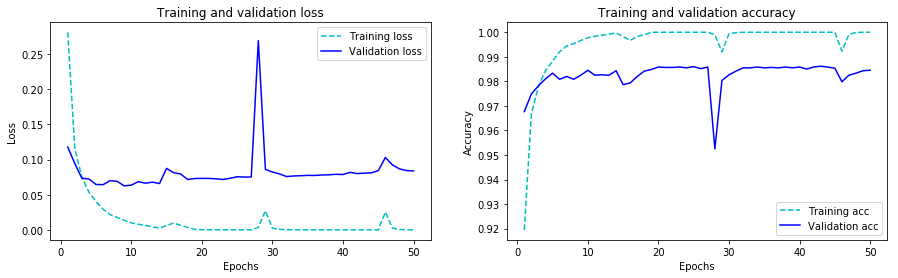

In [36]:
# Train more epoch using adam optimizer
# Experiment 6

save_history = fit_model(save_history, 
                         model_file = 'experiment_6.h5',
                         optimizer = 'adam',
                         batch_size = 128,
                         epochs = 50)

From the result, the sgd optimizer still underfit after training with 50 epochs while adam is overfit at the early epoch and converge very quickly around 10 epoch.

#### Inrease and decrease batch size 

- It is hard to inspect the effect using sgd. Thus, we will change to adam optimizer

Last train accuracy: 0.9961851852205065
Last validation accuracy: 0.9813333330154419


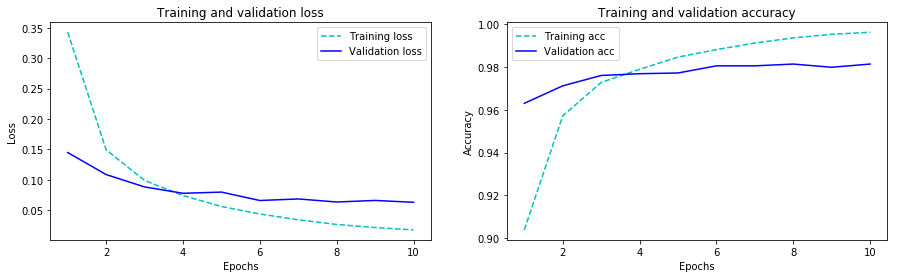

In [37]:
# Increase the batch size to 256 on 10 epoch
# Experiment 7

save_history = fit_model(save_history, 
                         model_file = 'experiment_7.h5',
                         optimizer = 'adam',
                         batch_size = 256)

Last train accuracy: 0.9923518519048338
Last validation accuracy: 0.9814999995231628


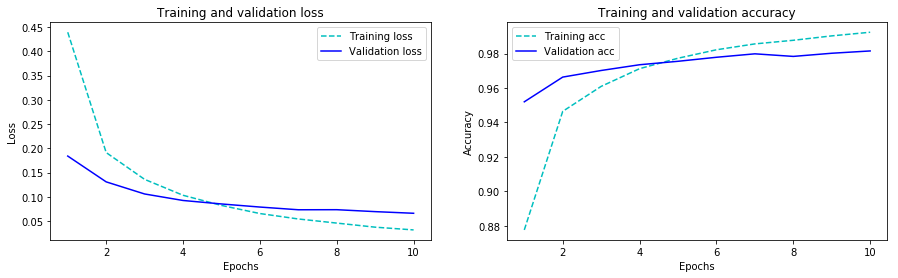

In [38]:
# Increase the batch size to 512
# Experiment 8

save_history = fit_model(save_history, 
                         model_file = 'experiment_8.h5',
                         optimizer = 'adam',
                         batch_size = 512)

Last train accuracy: 0.997
Last validation accuracy: 0.9825


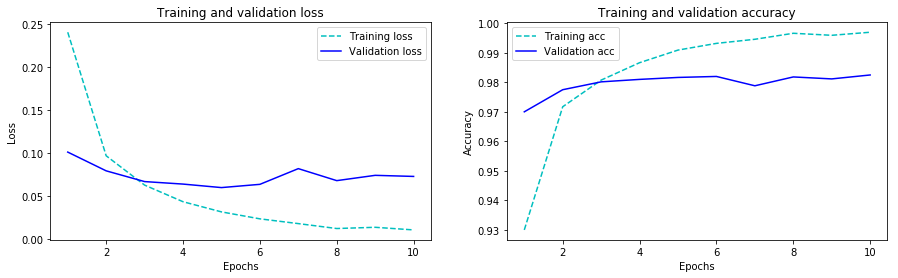

In [39]:
# Decrease the batch size to 64 on 10 epoch
# Experiment 9

save_history = fit_model(save_history, 
                         model_file = 'experiment_9.h5',
                         optimizer = 'adam',
                         batch_size = 64)

Last train accuracy: 0.9961296296296296
Last validation accuracy: 0.9815


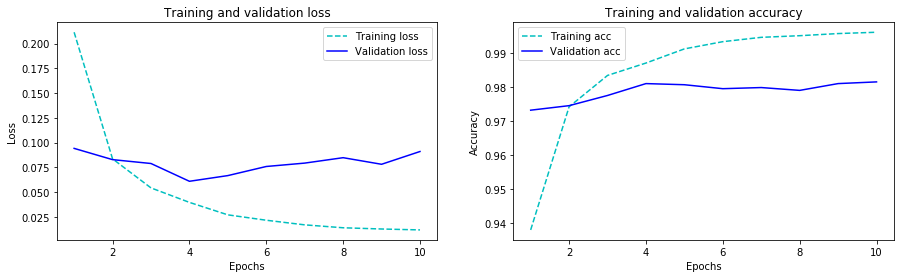

In [40]:
# Decrease the batch size to 32 on 10 epoch
# Experiment 10

save_history = fit_model(save_history, 
                         model_file = 'experiment_10.h5',
                         optimizer = 'adam',
                         batch_size = 32)

Different batch size can result in training time and model performance. The lower the batch size, the higher training time but lower memory required for training. However, it affect the performace of the model as the batch size of 64 is overfit at around epoch 3. the batch size of 32 is overfit at around epoch 2. the batch size of 512 is overfit at around epoch 4 to 5. The batch size of 64 get the fastest converge time at around epoch 8 while others still not converge at 10 epochs training.

#### Change neural network structure

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
hidden_2 (Dense)             (None, 1024)              525312    
_________________________________________________________________
output (Dense)               (None, 10)                10250     
Total params: 937,482
Trainable params: 937,482
Non-trainable params: 0
_________________________________________________________________
Last train accuracy: 0.9318518518165306
Last validation accuracy: 0.9454999998410543


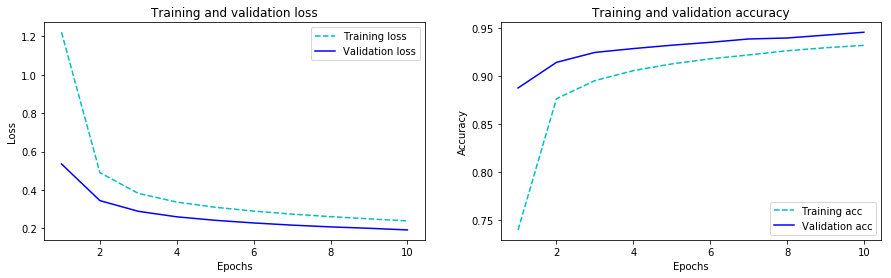

In [41]:
# Increase hidden layer with 1024 neuron node
# Experiment 11

dnn = models.Sequential()
dnn.add(layers.Dense(512,activation='relu',input_shape=(28*28,),name='hidden_1'))
dnn.add(layers.Dense(1024,activation='relu',name='hidden_2'))
dnn.add(layers.Dense(10,activation='softmax',name='output'))
dnn.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
dnn.summary()
history=dnn.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.1,verbose=False)
dnn.save_weights('experiment_model/experiment_11.h5')

save_history.append(history)
show_result(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
hidden_2 (Dense)             (None, 1024)              525312    
_________________________________________________________________
hidden_3 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
output (Dense)               (None, 10)                10250     
Total params: 1,987,082
Trainable params: 1,987,082
Non-trainable params: 0
_________________________________________________________________
Last train accuracy: 0.9433888889242101
Last validation accuracy: 0.9559999996821086


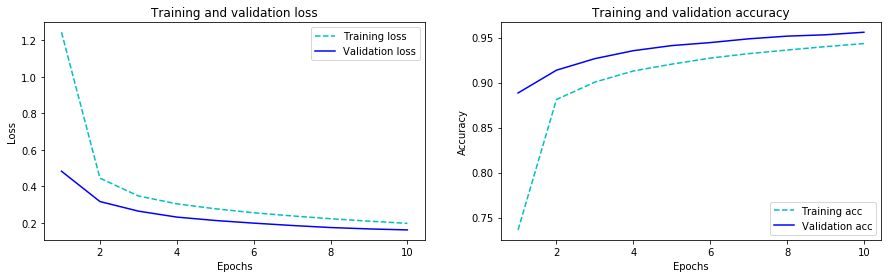

In [42]:
# Increase more hidden layer with 1024 neuron node
# Experiment 12

dnn = models.Sequential()
dnn.add(layers.Dense(512,activation='relu',input_shape=(28*28,),name='hidden_1'))
dnn.add(layers.Dense(1024,activation='relu',name='hidden_2'))
dnn.add(layers.Dense(1024,activation='relu',name='hidden_3'))
dnn.add(layers.Dense(10,activation='softmax',name='output'))
dnn.summary()
dnn.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=dnn.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.1,verbose=False)
dnn.save_weights('experiment_model/experiment_12.h5')

save_history.append(history)
show_result(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
hidden_2 (Dense)             (None, 1024)              525312    
_________________________________________________________________
hidden_3 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
hidden_4 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
output (Dense)               (None, 10)                10250     
Total params: 3,036,682
Trainable params: 3,036,682
Non-trainable params: 0
_________________________________________________________________
Last train accuracy: 0.9495370370723583
Last validation accuracy: 0.9601666663487752


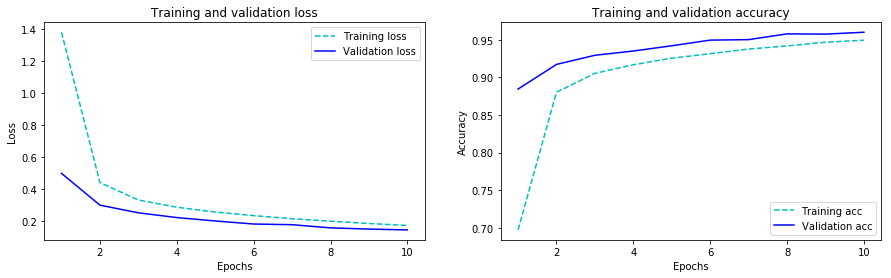

In [43]:
# Increase more hidden layer with 1024 neuron node
# Experiment 13

dnn = models.Sequential()
dnn.add(layers.Dense(512,activation='relu',input_shape=(28*28,),name='hidden_1'))
dnn.add(layers.Dense(1024,activation='relu',name='hidden_2'))
dnn.add(layers.Dense(1024,activation='relu',name='hidden_3'))
dnn.add(layers.Dense(1024,activation='relu',name='hidden_4'))
dnn.add(layers.Dense(10,activation='softmax',name='output'))
dnn.summary()
dnn.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=dnn.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.1,verbose=False)
dnn.save_weights('experiment_model/experiment_13.h5')

save_history.append(history)
show_result(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
hidden_2 (Dense)             (None, 1024)              525312    
_________________________________________________________________
hidden_3 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
hidden_4 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
output (Dense)               (None, 10)                10250     
Total params: 3,036,682
Trainable params: 3,036,682
Non-trainable params: 0
_________________________________________________________________
Last train accuracy: 0.9930740740740741
Last validation accuracy: 0.9824999995231628


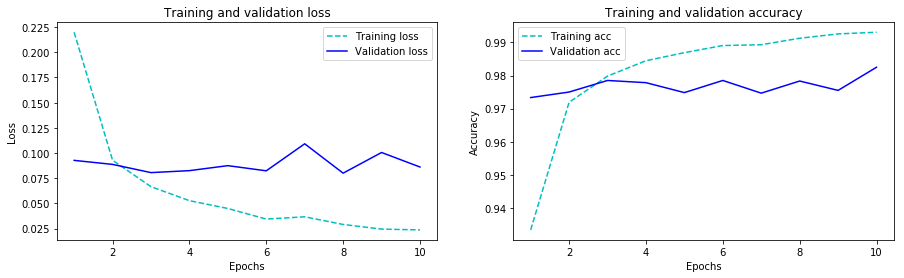

In [44]:
# Use 5 neural network with adam
# Experiment 14

dnn = models.Sequential()
dnn.add(layers.Dense(512,activation='relu',input_shape=(28*28,),name='hidden_1'))
dnn.add(layers.Dense(1024,activation='relu',name='hidden_2'))
dnn.add(layers.Dense(1024,activation='relu',name='hidden_3'))
dnn.add(layers.Dense(1024,activation='relu',name='hidden_4'))
dnn.add(layers.Dense(10,activation='softmax',name='output'))
dnn.summary()
dnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=dnn.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.1,verbose=False)
dnn.save_weights('experiment_model/experiment_14.h5')

save_history.append(history)
show_result(history)

The higher layer tend to converge longer compare to smaller network becuase the there are more parameter in higher layer neural network. You can see from the 5-layer neural network with adam optimizer comparing with 2-layer in the previous result. At 10 epoch, the 5-layer NN model is not converge yet. In constrast, 2-layer NN model is converged around 8 epoch

### 7. Discussion and Result
Write down your analysis from previous step

**ANSWER**

Different hyperparameter tend to give different result as discussed above. The best optimizer so far is Adam optimizer which converge at around 8 epoch. However, the model is facing the overfit problem which need more tuning method to prevent overfitting.